## Stock series modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

c:\users\josè valencia\appdata\local\programs\python\python38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


ImportError: cannot import name 'urlencode' from 'pandas.io.common' (c:\users\josè valencia\appdata\local\programs\python\python38\lib\site-packages\pandas\io\common.py)

In [59]:
now = web.DataReader('NOW', 'yahoo',start = '2019-01-20', end='2020-01-20').Close
now.head()

Date
2019-01-22    185.699997
2019-01-23    183.960007
2019-01-24    185.699997
2019-01-25    191.080002
2019-01-28    187.940002
Name: Close, dtype: float64

In [60]:
lognow = 100*(np.log(now/now.shift(1)).dropna())


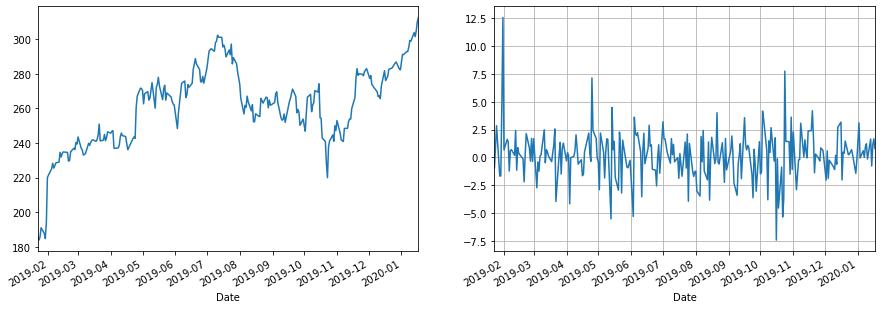

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
now.plot()
plt.subplot(1,2,2,)
lognow.plot()
plt.grid( which='both')
plt.show()

In [20]:
from arch.univariate import arch_model, ARX, GARCH, StudentsT, HARX, ARCH

In [62]:
model_arch1 = arch_model(lognow,p=1,  q=1, dist='ged', mean='AR', vol='EGARCH').fit(disp='off')
print(model_arch1.summary())

                                AR - EGARCH Model Results                                 
Dep. Variable:                              Close   R-squared:                      -0.000
Mean Model:                                    AR   Adj. R-squared:                 -0.000
Vol Model:                                 EGARCH   Log-Likelihood:               -525.553
Distribution:      Generalized Error Distribution   AIC:                           1061.11
Method:                        Maximum Likelihood   BIC:                           1078.71
                                                    No. Observations:                  250
Date:                            Sun, Mar 22 2020   Df Residuals:                      245
Time:                                    22:43:07   Df Model:                            5
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-----------------------------------

In [63]:
model_arch = ARX(lognow, lags=1)
model_arch.distribution = StudentsT()
model_arch.volatility = GARCH(p=1,q=1)

In [64]:
model = model_arch.fit(disp='off')
print(model.summary())

                              AR - GARCH Model Results                              
Dep. Variable:                        Close   R-squared:                      -0.000
Mean Model:                              AR   Adj. R-squared:                 -0.004
Vol Model:                            GARCH   Log-Likelihood:               -524.706
Distribution:      Standardized Student's t   AIC:                           1061.41
Method:                  Maximum Likelihood   BIC:                           1082.52
                                              No. Observations:                  249
Date:                      Sun, Mar 22 2020   Df Residuals:                      243
Time:                              22:43:38   Df Model:                            6
                                 Mean Model                                
                  coef    std err          t      P>|t|    95.0% Conf. Int.
---------------------------------------------------------------------------
Const  

In [66]:
from statsmodels.tsa.stattools import ARMA

In [67]:
model_arma = ARMA(lognow, order=(1,1))
model2 = model_arma.fit(disp=0)
print(model2.summary())

c:\users\josè valencia\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  250
Model:                     ARMA(1, 1)   Log Likelihood                -546.874
Method:                       css-mle   S.D. of innovations              2.157
Date:                Sun, 22 Mar 2020   AIC                           1101.747
Time:                        22:43:56   BIC                           1115.833
Sample:                             0   HQIC                          1107.417
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2082      0.139      1.501      0.133      -0.064       0.480
ar.L1.Close     0.2299      2.354      0.098      0.922      -4.384       4.844
ma.L1.Close    -0.2168      2.361     -0.092    

In [68]:
model2.forecast()

(array([0.22071612]), array([2.15664944]), array([[-4.00623911,  4.44767135]]))

In [125]:
lognow[-1]

0.008031655884877142

In [58]:
import scipy.stats as sps

In [69]:
t_para = sps.t.fit(lognow)
x = np.linspace(np.min(lognow),np.max(lognow), 1000)
fit_t = sps.t.pdf(x, t_para[0], t_para[1], t_para[2])
n_par = sps.norm.fit(lognow)
fit_no = sps.norm.pdf(x,n_par[0],n_par[1])

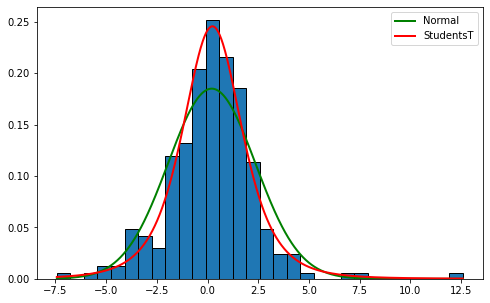

In [76]:
plt.figure(figsize=(8,5))
plt.plot(x, fit_no, linewidth=2, label='Normal', color='green')
plt.plot(x,fit_t, linewidth=2, label='StudentsT', color='red')
lognow.hist(bins = 30, density=True, edgecolor='black')
plt.legend()
plt.grid()
plt.show()

In [78]:
lognow.shape

(753,)

In [8]:
from datetime import datetime

In [77]:
inicio = datetime(2016,5,19)
fin = datetime(2018,7,19)

In [98]:
sp_500 = web.DataReader('^GSPC', 'yahoo', start = inicio, end=fin).Low
log_ret = (np.log(sp_500/sp_500.shift(1)).dropna())*100

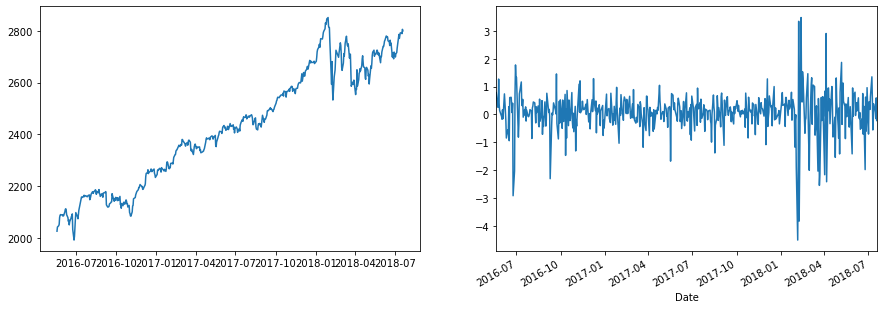

In [99]:
plt.figure(figsize=(15,5))
fig1 = plt.subplot(1,2,1)
plt.plot(sp_500)
fig2 = plt.subplot(1,2,2)
log_ret.plot()
plt.show()

In [102]:
model_sp= arch_model(log_ret*100,p=1, q=1, dist='StudentsT', mean='AR', vol='GARCH')
model_fit= model_sp.fit(disp='off')

In [103]:
print(model_fit.summary())

                              AR - GARCH Model Results                              
Dep. Variable:                          Low   R-squared:                      -0.004
Mean Model:                              AR   Adj. R-squared:                 -0.004
Vol Model:                            GARCH   Log-Likelihood:               -2958.20
Distribution:      Standardized Student's t   AIC:                           5926.39
Method:                  Maximum Likelihood   BIC:                           5947.90
                                              No. Observations:                  545
Date:                      Sun, Mar 22 2020   Df Residuals:                      540
Time:                              22:57:15   Df Model:                            5
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const         10

In [111]:
l=log_ret/100

In [113]:
len(log_ret)

545

In [104]:
norm1 = sps.norm.fit(log_ret)
t1 = sps.t.fit(log_ret)
x1 = np.linspace(np.min(log_ret), np.max(log_ret), 1000)
pdf1= sps.norm.pdf(x1, norm1[0], norm1[1])
pdf2= sps.t.pdf(x1,t1[0],t1[1],t1[2])

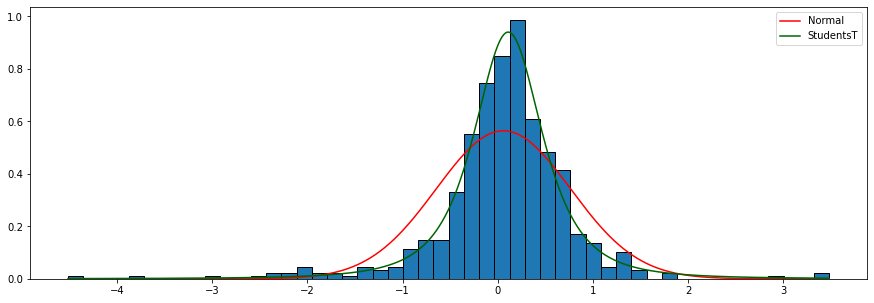

In [110]:
plt.figure(figsize=(15,5))
plt.hist(log_ret,bins=50,density=True, edgecolor='black')
plt.plot(x1,pdf1, label='Normal', color='red')
plt.plot(x1, pdf2, label='StudentsT', color='darkgreen')
plt.legend()
plt.show()

In [86]:
model_sp2 = ARX(log_ret*100, lags=1)
model_sp2.distribution = StudentsT()
model_sp2.volatility = GARCH(p=1, q=1)

In [87]:
model_fit2 = model_sp2.fit(disp='off')
print(model_fit2.summary())

                              AR - GARCH Model Results                              
Dep. Variable:                          Low   R-squared:                      -0.004
Mean Model:                              AR   Adj. R-squared:                 -0.006
Vol Model:                            GARCH   Log-Likelihood:               -447.061
Distribution:      Standardized Student's t   AIC:                           906.122
Method:                  Maximum Likelihood   BIC:                           931.916
                                              No. Observations:                  544
Date:                      Sun, Mar 22 2020   Df Residuals:                      538
Time:                              22:47:48   Df Model:                            6
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
C